In [52]:
from stepmix.stepmix import StepMix
import pandas as pd
import numpy as np
# import ParameterGrid
from sklearn.model_selection import ParameterGrid

import matplotlib.pyplot as plt
import seaborn as sns

import pickle as pkl

from permtest import perm_test

In [2]:
df = pd.read_csv("../data/cleaned_data_SYMPTOMS_9_13_23.csv", index_col=0)
sympdf = df.loc[:, df.columns.str.startswith('Symptom_')]
sympdf.shape

(6031, 162)

In [3]:
fulllist = sympdf.columns.tolist()

In [4]:
fullset = pd.DataFrame(data = {'symptoms':fulllist}
)

In [5]:
# split the index using underscore and put the values into columns of fullset
fullset[['label','category','c','d','e','f','g']] = fullset['symptoms'].str.split('_',expand=True)



In [6]:
symptoms_with_cat = fullset.loc[:,['symptoms','category']]

In [7]:
symptoms_with_cat.index = symptoms_with_cat["symptoms"]

In [9]:

# I don't love these categories actually
new_dict = {
    'Memory': ['Symptom_Memory_short',
               'Symptom_Memory_long',
               'Symptom_Memory_no_new_memories',
               'Symptom_Memory_forget_tasks',
               'Symptom_Memory_other'],
   'Cognitive': ['Symptom_Cognitive_Functioning_thinking',
                'Symptom_Cognitive_Functioning_executive',
                'Symptom_Cognitive_Functioning_problemsolving',
                'Symptom_Cognitive_Functioning_slowedthoughts',
                'Symptom_Cognitive_Functioning_fastthoughts',
                'Symptom_Cognitive_Functioning_agnosia',
                'Symptom_Cognitive_Functioning_attentionconcentration',
                'Symptom_Speech_difficulty_reading_processing_text',
                'Symptom_Cognitive_Functioning_other',
                'Symptom_Acute_confusion'],
    'Speech': ['Symptom_Speech_difficulty_finding_words',
                'Symptom_Speech_difficulty_communicating_verbally',
                'Symptom_Speech_difficulty_speaking_complete_sentences',
                'Symptom_Speech_speaking_unrecognizable_words',
                'Symptom_Speech_difficulty_communicating_writing',
                'Symptom_Speech_changes_to_secondary_languages',
                'Symptom_Speech_other',
                'Symptom_Slurring_words'],
    'Auditory': ['Symptom_Speech_difficulty_understanding_others_speech',
                'Symptom_Hallucinations_auditory',
                'Symptom_Hearing_loss',
                'Symptom_Tinnitus','Symptom_Ear_sensitivity_to_noise',
                'Symptom_Ear_ear_pain',
                'Symptom_Ear_changes_to_ear_canal',
                'Symptom_Ear_numbness',
                'Symptom_Other_ear_hearing_symptoms'
                ],
    'Headaches': ['Symptom_Headaches_behind_eyes',
                'Symptom_Headaches_stiff_neck',
                'Symptom_Headaches_brain_pressure',
                'Symptom_Headaches_diffuse',
                'Symptom_Headaches_temples',
                'Symptom_Headaches_base_of_skull',
                'Symptom_Headaches_after_mental_exertion',
                'Symptom_Headaches_migraines',
                'Symptom_Headaches_other',
                'Symptom_Headaches_brain_warmth'],
    'Olfaction': ['Symptom_Loss_of_smell',
                'Symptom_Loss_of_taste',
                'Symptom_Altered_smell',
                'Symptom_Altered_taste',
                'Symptom_Phantom_smell',
                'Symptom_Phantom_taste',
                'Symptom_Heightened_smell',
                'Symptom_Heightened_taste',],
    'Gastrointenstinal': ['Symptom_Loss_of_appetite',
                          'Symptom_Constipation',
                          'Symptom_Diarrhea',
                          'Symptom_Vomiting',
                          'Symptom_Nausea',
                          'Symptom_Acid_reflux',
                          'Symptom_Gastrointestinal_feeling_full_quickly_eating',
                          'Symptom_Gastrointestinal_abdominal_pain',
                          'Symptom_Gastrointestinal_hyperactive_bowel'],
    'Sensory': ['Symptom_Vibrating_sensations',
            'Symptom_Hallucinations_tactile',
            'Symptom_Sensations_skin_burning_no_rash',
            'Symptom_Sensations_numbness_loss_sensation',
            'Symptom_Sensations_tingling_prickling',
            'Symptom_Sensations_electrical_zaps',
            'Symptom_Sensations_facial_pressure_left',
            'Symptom_Sensations_facial_pressure_right',
            'Symptom_Sensations_facial_pressure_other'
            ],
    'Motor': ['Symptom_Tremors',
              'Symptom_Restless_leg',
              'Symptom_Sensations_weakness',
              'Symptom_Sensations_facial_paralysis'],
    'Sleep':['Symptom_Insomnia',
             'Symptom_Night_sweats',
             'Symptom_Awakened_cannot_breathe',
             'Symptom_Vivid_dreams',
             'Symptom_Lucid_dreams',
             'Symptom_Sleep_apnea',
             'Symptom_Sleep_other',
             'Symptom_Difficulty_falling_asleep',
             'Symptom_Waking_up_early',
             'Symptom_Waking_up_in_night',
             ],
    'Vision' : ['Symptom_Hallucinations_visual',
                'Symptom_Eye_vision_symptoms',
                'Symptom_Eye_Vision_blurred_vision',
                'Symptom_Eye_Vision_sensitivity_to_light',
                'Symptom_Eye_Vision_dry_eyes',
                'Symptom_Eye_Vision_eye_pressure_pain',
                'Symptom_Eye_Vision_floaters',
                'Symptom_Eye_Vision_double_vision',
                'Symptom_Eye_Vision_tunnel_vision',
                'Symptom_Eye_Vision_loss_of_vision',
                'Symptom_Eye_Vision_seeing_things_peripheral_vision',
                'Symptom_Eye_Vision_other_eye_issues'],
    'Temperature': ['Symptom_Sensations_coldness',
                    'Symptom_Temp_lability',
                    'Symptom_Heat_intolerance',
                    'Symptom_Merged_temperature_other_temp_issues',
                    'Symptom_Elevated_temp',
                    'Symptom_Fever',
                    'Symptom_Low_temp',
                    'Symptom_Chills_flushing_sweats'],
    'Cardiac':['Symptom_Tachycardia',
               'Symptom_Bradycardia',
               'Symptom_Heart_palpitations',
               'Symptom_Fainting',
               'Symptom_Dizziness_vertigo'],
    'Respiratory': ['Symptom_Gasping_air_normal_oxygen',
                    'Symptom_Dry_cough',
                    'Symptom_Cough_with_mucus',
                    'Symptom_Coughing_up_blood',
                    'Symptom_Shortness_of_breath',
                    'Symptom_Tightness_of_chest',
                    'Symptom_Rattling_breath',
                    'Symptom_Respiratory_other'],
    'Allergic' : [ 'Symptom_New_anaphylaxis',
                   'Symptom_New_allergies',
                   'Symptom_Sneezing',
                   'Symptom_Runny_nose',
                   'Symptom_Dermatographia',
                   'Symptom_Skin_Allergy_other',
                   'Symptom_SkinAllergy_itchy_skin',
                   'Symptom_SkinAllergy_itchy_eyes',
                   'Symptom_SkinAllergy_heighted_reaction_allergies',],
    'Genitourinary': ['Symptom_Reproductive_all_menstrual_issues',
                'Symptom_Reproductive_early_menopause',
                'Symptom_Reproductive_abnormally_heavy_periods_clotting',
                'Symptom_Reproductive_testicle_penis_pain_changes',
                'Symptom_Reproductive_sexual_dysfunction',
                'Symptom_Reproductive_postmenopausal_bleeding',
                'Symptom_Reproductive_other_urinary_issues',
                'Symptom_Reproductive_other_menstrual_issues',
                'Symptom_Reproductive_abnormally_irregular_periods',
                'Symptom_Bladder_control',
                ],
    'Skin': ['Symptom_Peeling_skin',
             'Symptom_Petechiae',
             'Symptom_Covid_toes',
             'Symptom_Skin_rashes'],
    'Musculoskeletal': ['Symptom_Muscle_spasms', 
                        'Symptom_Muscle_aches',
                        'Symptom_Joint_pain',
                        'Symptom_Bone_ache_burning'],
    'Misc': ['Symptom_Difficulty_swallowing', 
            'Symptom_Hallucinations_other',
            'Symptom_Sensations_numbness_one_sided_weakness',
            'Symptom_Bulging_veins',
            'Symptom_Sore_throat',
            'Symptom_Inability_to_yawn',
            'Symptom_Changes_in_voice',
            'Symptom_Extreme_thirst',
            'Symptom_SkinAllergy_brittle_nail',
            'Symptom_SkinAllergy_other_itchy',
            'Symptom_SkinAllergy_shingles',
            'Symptom_PEM',
            'Symptom_Fatigue',
            'Symptom_Change_sensitivity_to_meds',
            'Symptom_Neuralgia',
            'Symptom_Pain_burning_chest',
            'Symptom_Eye_Vision_pink_eye',
            'Symptom_Eye_Vision_bloodshot_eyes',
            'Symptom_Eye_Vision_redness_outside_eye'],
}

# got through neuralgia

In [10]:
pd.DataFrame.from_dict(new_dict, orient='index')
# convert to long
symptoms_by_cat_long = pd.DataFrame.from_dict(new_dict, orient='index').stack().reset_index()

In [11]:
symptoms_by_cat_long.iloc[:,2]

0                        Symptom_Memory_short
1                         Symptom_Memory_long
2              Symptom_Memory_no_new_memories
3                 Symptom_Memory_forget_tasks
4                        Symptom_Memory_other
                        ...                  
156                         Symptom_Neuralgia
157                Symptom_Pain_burning_chest
158               Symptom_Eye_Vision_pink_eye
159         Symptom_Eye_Vision_bloodshot_eyes
160    Symptom_Eye_Vision_redness_outside_eye
Name: 0, Length: 161, dtype: object

In [12]:
groups_df = pd.DataFrame(symptoms_by_cat_long[[0,'level_0']].values)

In [13]:
groups_df.columns = ['symptom','group']

In [14]:
groups_df.to_csv('output/symptom_groups.csv',index=False)
groups_df.to_csv('../clusterings/Tessa/symptom_groups.csv',index=False)

In [15]:
# try looking at existing clusters on the new groups -- are they still distinguishable?
# also rank relative expression of each grouping -- either by mean or by max

# get the list of symptoms in each group
groups_df.group.unique()

array(['Memory', 'Cognitive', 'Speech', 'Auditory', 'Headaches',
       'Olfaction', 'Gastrointenstinal', 'Sensory', 'Motor', 'Sleep',
       'Vision', 'Temperature', 'Cardiac', 'Respiratory', 'Allergic',
       'Genitourinary', 'Skin', 'Musculoskeletal', 'Misc'], dtype=object)

In [36]:
groups_df.group

0      Memory
1      Memory
2      Memory
3      Memory
4      Memory
        ...  
156      Misc
157      Misc
158      Misc
159      Misc
160      Misc
Name: group, Length: 161, dtype: object

In [16]:
# import my clusters, compare average scores for each of these groups across clusters
clus = pd.read_csv("output/cluster_13_111023.csv", index_col=0)

In [17]:
sympdf['cluster'] = clus

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_3800/4197125953.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sympdf['cluster'] = clus


In [18]:
avg_scores_by_grouping = {}

for grouping in groups_df.group.unique():
    # calculat the average score for each symptom in the group for each cluster in 'cluster'
    keepcols = groups_df.loc[groups_df.group == grouping, 'symptom'].tolist()
    #print(keepcols)
    keepcols.append('cluster')
    a = sympdf.loc[:, keepcols]
    avg = a.groupby('cluster').mean()
    avg_scores_by_grouping[grouping] = avg.mean(axis=1)
    #avg = sympdf.loc[:, sympdf.columns.str.startswith(grouping)].groupby(clus).mean()



In [19]:
avgdf  = pd.DataFrame(avg_scores_by_grouping)
# this is getting me the average over patients for each symptom
# I think I maybe need to transpose 

<Axes: xlabel='cluster'>

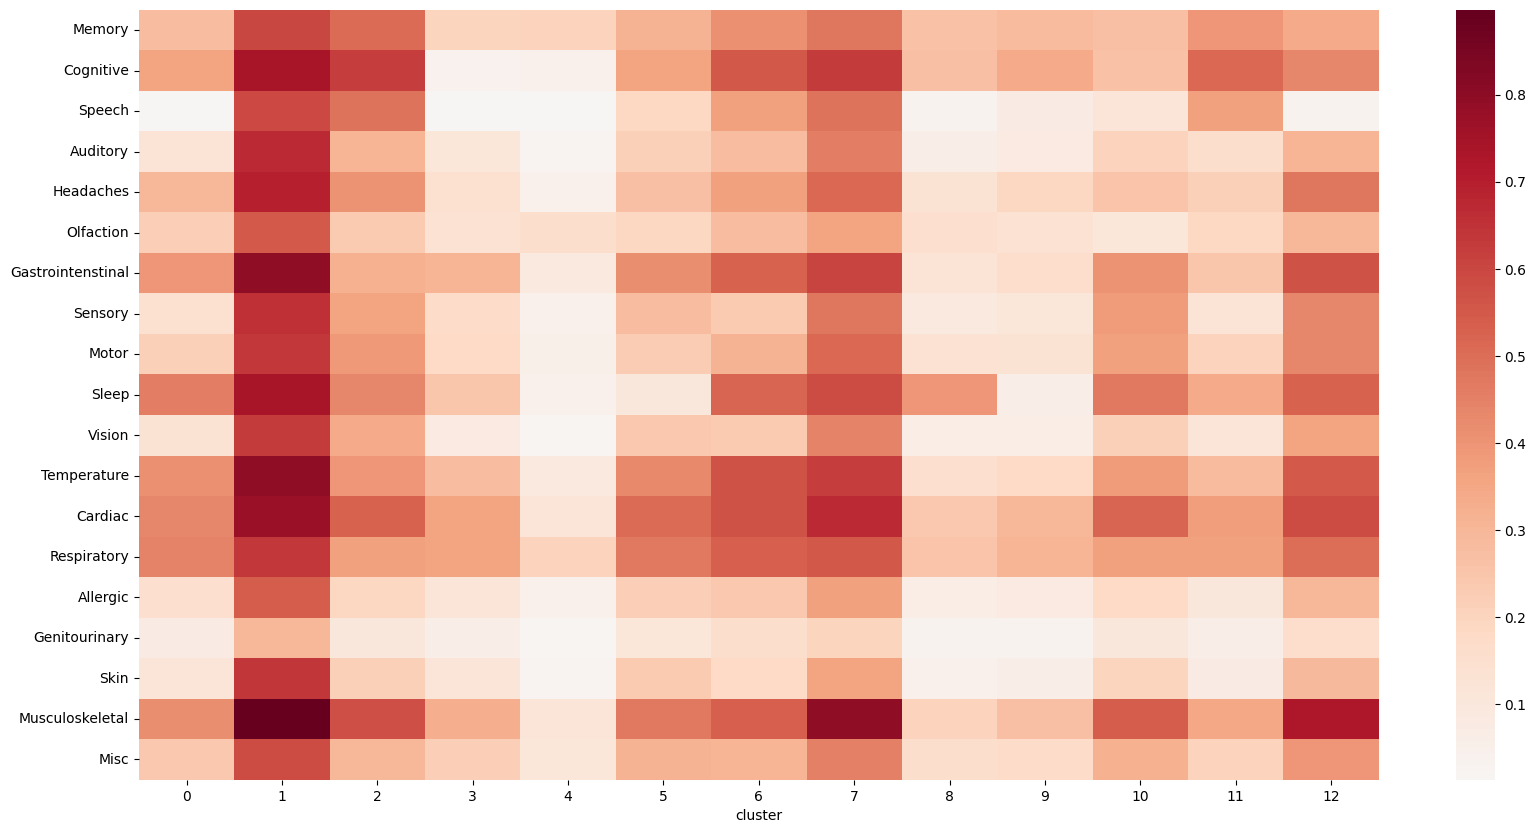

In [20]:
# plot avgdf as heatmap
plt.figure(figsize=(20,10))
sns.heatmap(avgdf.transpose(), cmap='RdBu_r', center=0)

In [136]:
# create a dataframe with the index of sympdf and the columns from groups_df.group.unique()
# fill with 0s

anydf=pd.DataFrame(index=sympdf.index, columns=groups_df.group.unique())

In [137]:
# now instead of taking the average score for each symptom group
# for each patient I want to convert each group into a column which is 
# 1 if any of the symptoms in that group is 1, and 0 otherwise
# then I can take the average over patients



for grouping in groups_df.group.unique():
    # calculate the average score for each symptom in the group for each cluster in 'cluster'
    keepcols = groups_df.loc[groups_df.group == grouping, 'symptom'].tolist()
    groupsymps = sympdf.loc[:, keepcols]
    anydf[grouping] = groupsymps.any(axis=1).astype(int)





In [43]:
# check if any nonzero values in each row

anydf

# drop misc column

anydf = anydf.drop(columns='Misc')

In [44]:
model = StepMix(n_components=13, measurement="binary", verbose=0, random_state=123)
model.fit(anydf)


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.96s/it, max_LL=-5.01e+4, max_avg_LL=-8.31]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


StepMix(measurement='binary', n_components=13, random_state=123)

In [45]:
grid = {
    'n_components': [ 2,3, 4,5, 6, 7, 8, 9, 10,11,12,13,14,15,16,17,18,19,20],
}

In [48]:
results = dict(param_n_components=[], aic=[], bic=[])

for g in ParameterGrid(grid):
    model.set_params(**g)
    model.fit(anydf)
    results['param_n_components'].append(g['n_components'])
    results['aic'].append(model.aic(anydf))
    results['bic'].append(model.bic(anydf))
results = pd.DataFrame(results)

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00, 30.46it/s, max_LL=-5.16e+4, max_avg_LL=-8.55]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.92it/s, max_LL=-5.08e+4, max_avg_LL=-8.43]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.56it/s, max_LL=-5.06e+4, max_avg_LL=-8.39]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.29s/it, max_LL=-5.05e+4, max_avg_LL=-8.37]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.17s/it, max_LL=-5.04e+4, max_avg_LL=-8.35]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.87s/it, max_LL=-5.03e+4, max_avg_LL=-8.34]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.52s/it, max_LL=-5.03e+4, max_avg_LL=-8.34]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.55s/it, max_LL=-5.02e+4, max_avg_LL=-8.33]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.89s/it, max_LL=-5.02e+4, max_avg_LL=-8.32]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.54s/it, max_LL=-5.01e+4, max_avg_LL=-8.31]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.17s/it, max_LL=-5.01e+4, max_avg_LL=-8.31]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.68s/it, max_LL=-5.01e+4, max_avg_LL=-8.31]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.22s/it, max_LL=-5.01e+4, max_avg_LL=-8.3]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.55s/it, max_LL=-5e+4, max_avg_LL=-8.3]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.30s/it, max_LL=-5e+4, max_avg_LL=-8.29]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.54s/it, max_LL=-5e+4, max_avg_LL=-8.29]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.87s/it, max_LL=-5e+4, max_avg_LL=-8.29]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.38s/it, max_LL=-5e+4, max_avg_LL=-8.28]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:08<00:00,  8.50s/it, max_LL=-5e+4, max_avg_LL=-8.28]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


In [49]:
results['bic'].idxmin()

3

In [50]:
results.iloc[4,:]

param_n_components         6.000000
aic                   100967.530176
bic                   101725.157673
Name: 4, dtype: float64

In [51]:
# finding: clustering on just these grouped symptoms gets me 6 clusters rather than 13

# still need ot check distinguishability of the 13 for these groupings

# also need to check the relative expression of each grouping for the 6-cluster solution

In [53]:
model = StepMix(n_components=6, measurement="binary", verbose=0, random_state=123)
model.fit(anydf)

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.16s/it, max_LL=-5.04e+4, max_avg_LL=-8.35]


StepMix(measurement='binary', n_components=6, random_state=123)

In [76]:
clusters = model.predict(anydf)
clusters = pd.DataFrame(clusters, index= anydf.index)
clusters.columns = ["cluster"]

In [78]:
res_pval, res_teststat = perm_test(anydf, clusters)

In [79]:
res_pval

,0,1,4,2,3,5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,NaN,NaN,NaN,NaN
2,0.0,0.0,0.0,NaN,NaN,NaN
3,0.0,0.0,0.0,0.0,NaN,NaN
5,0.0,0.0,0.0,0.0,0.0,NaN


In [80]:
res_teststat

,0,1,4,2,3,5
0,NaN,1.299407,1.173734,1.097134,2.01599,1.431066
1,1.299407,NaN,0.91746,1.147158,0.863249,2.509979
4,1.173734,0.91746,NaN,1.639903,1.176602,2.408628
2,1.097134,1.147158,1.639903,NaN,1.845905,1.713707
3,2.01599,0.863249,1.176602,1.845905,NaN,3.168249
5,1.431066,2.509979,2.408628,1.713707,3.168249,NaN


In [81]:
with open('output/stepmix_sympgrouping_010224.pkl', 'wb') as f:
    pkl.dump(model, f)

clusters.to_csv("output/stepmix_sympgrouping_010224.csv")

In [82]:
clusters.value_counts()

cluster
1          1960
3          1553
0          1268
4           583
2           437
5           230
Name: count, dtype: int64

In [85]:
df = anydf.copy()

In [86]:
df['cluster'] = clusters

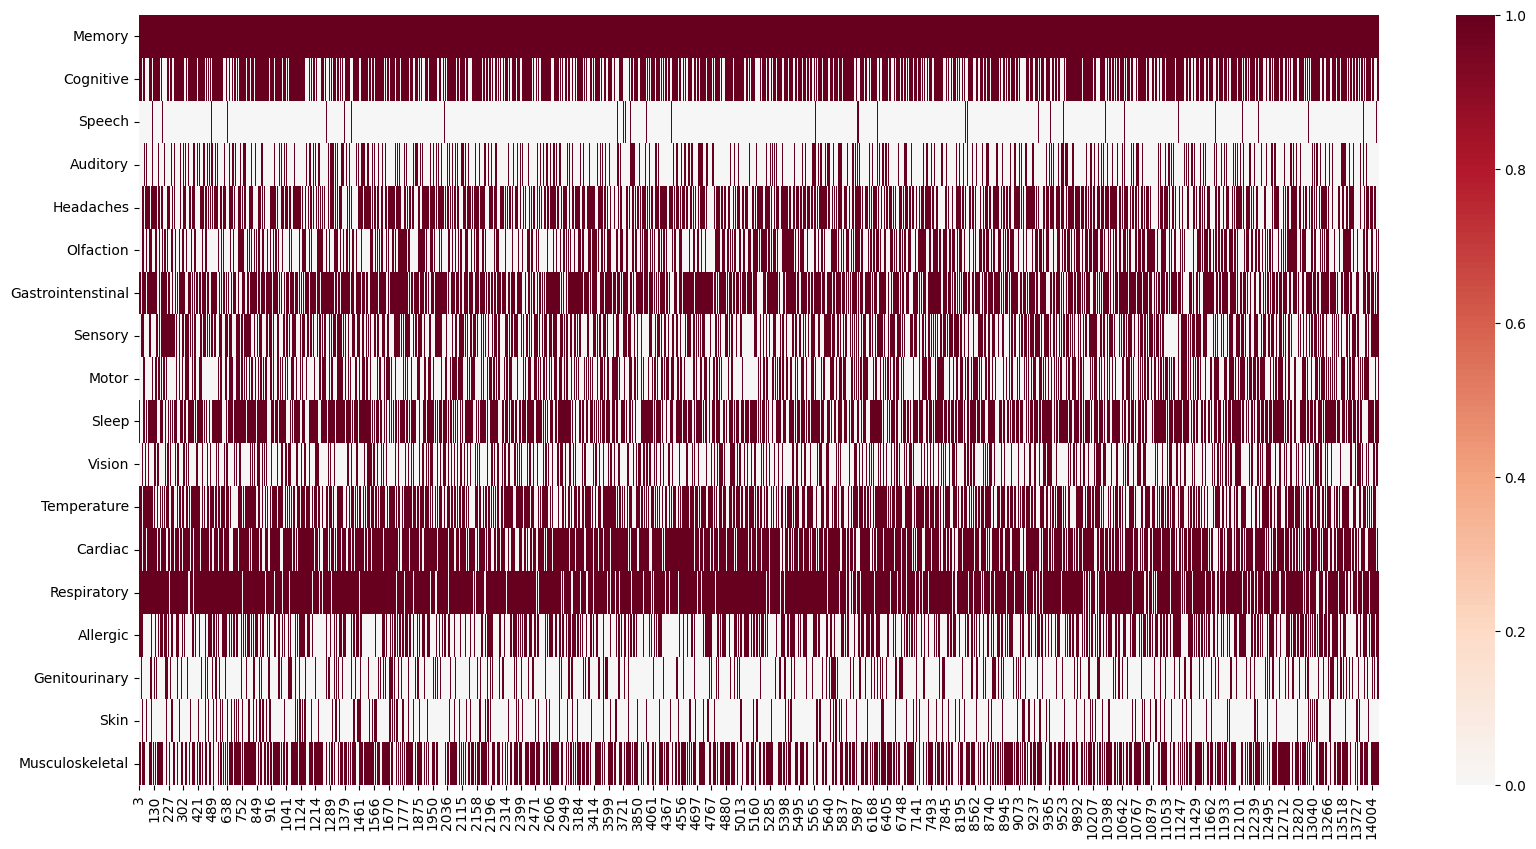

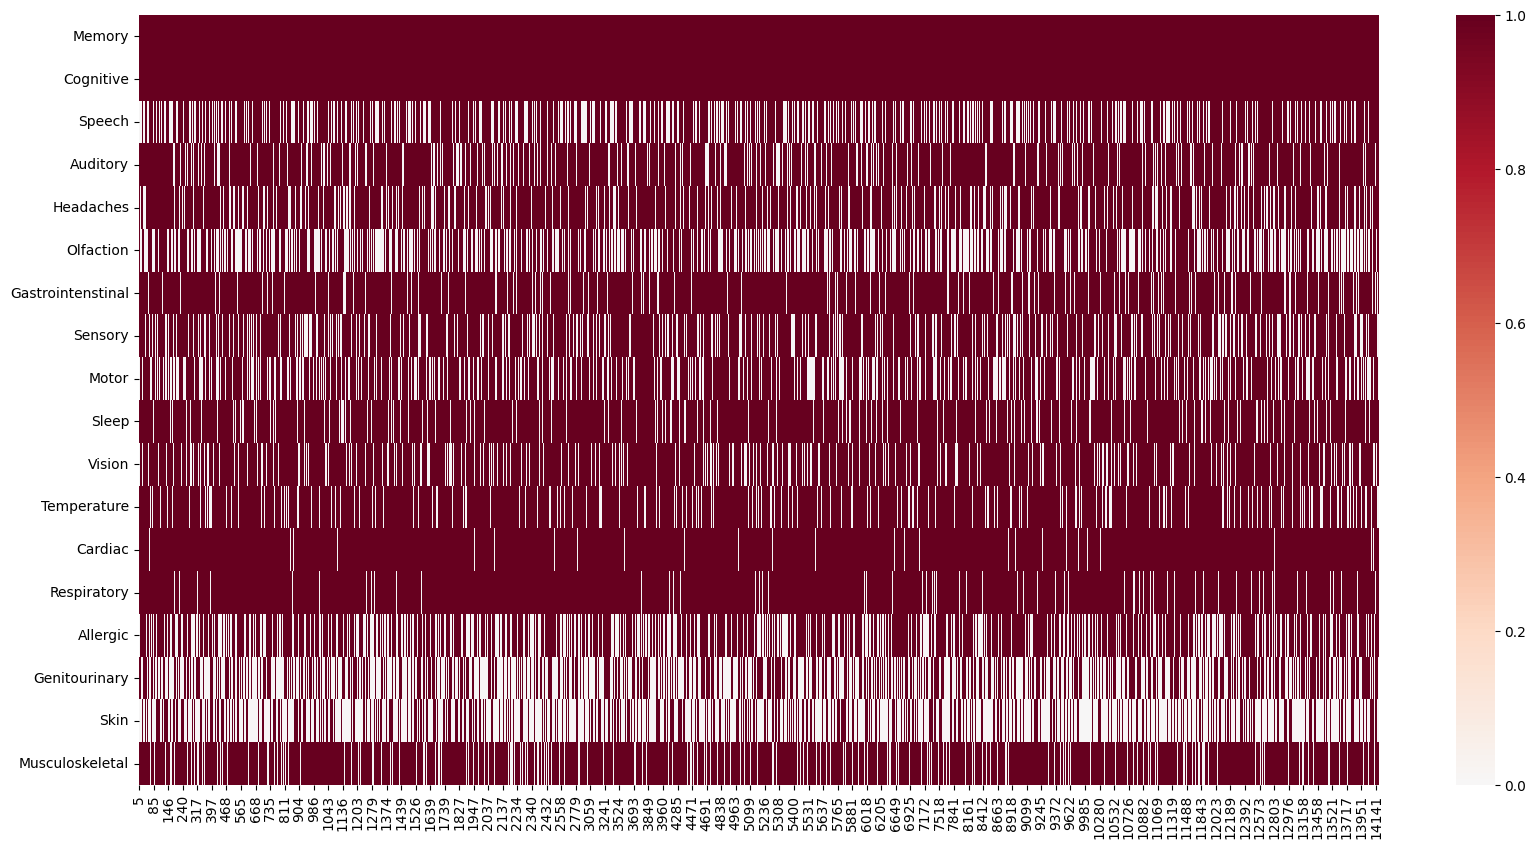

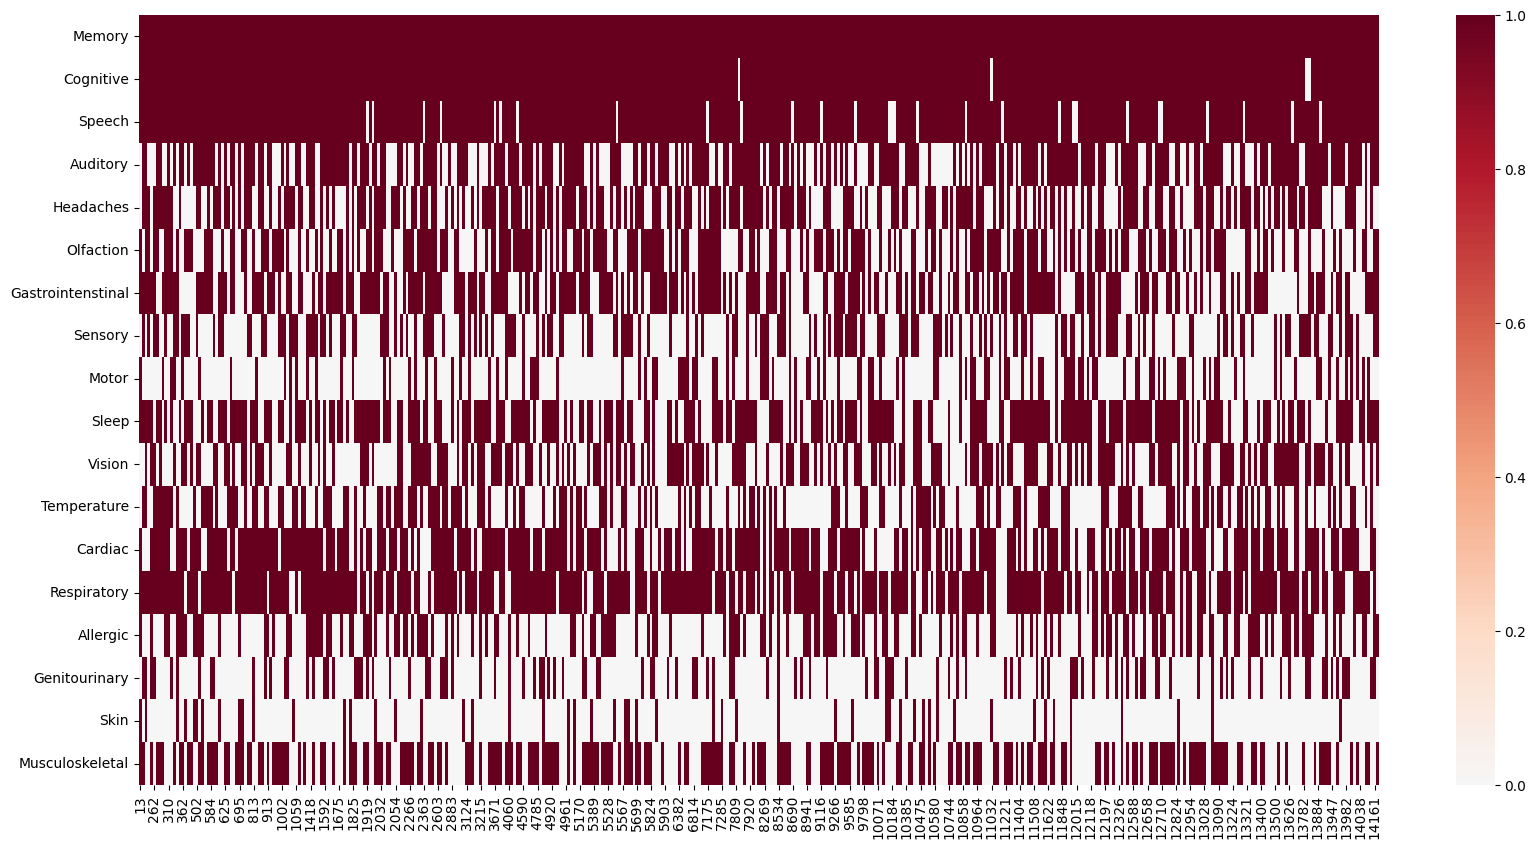

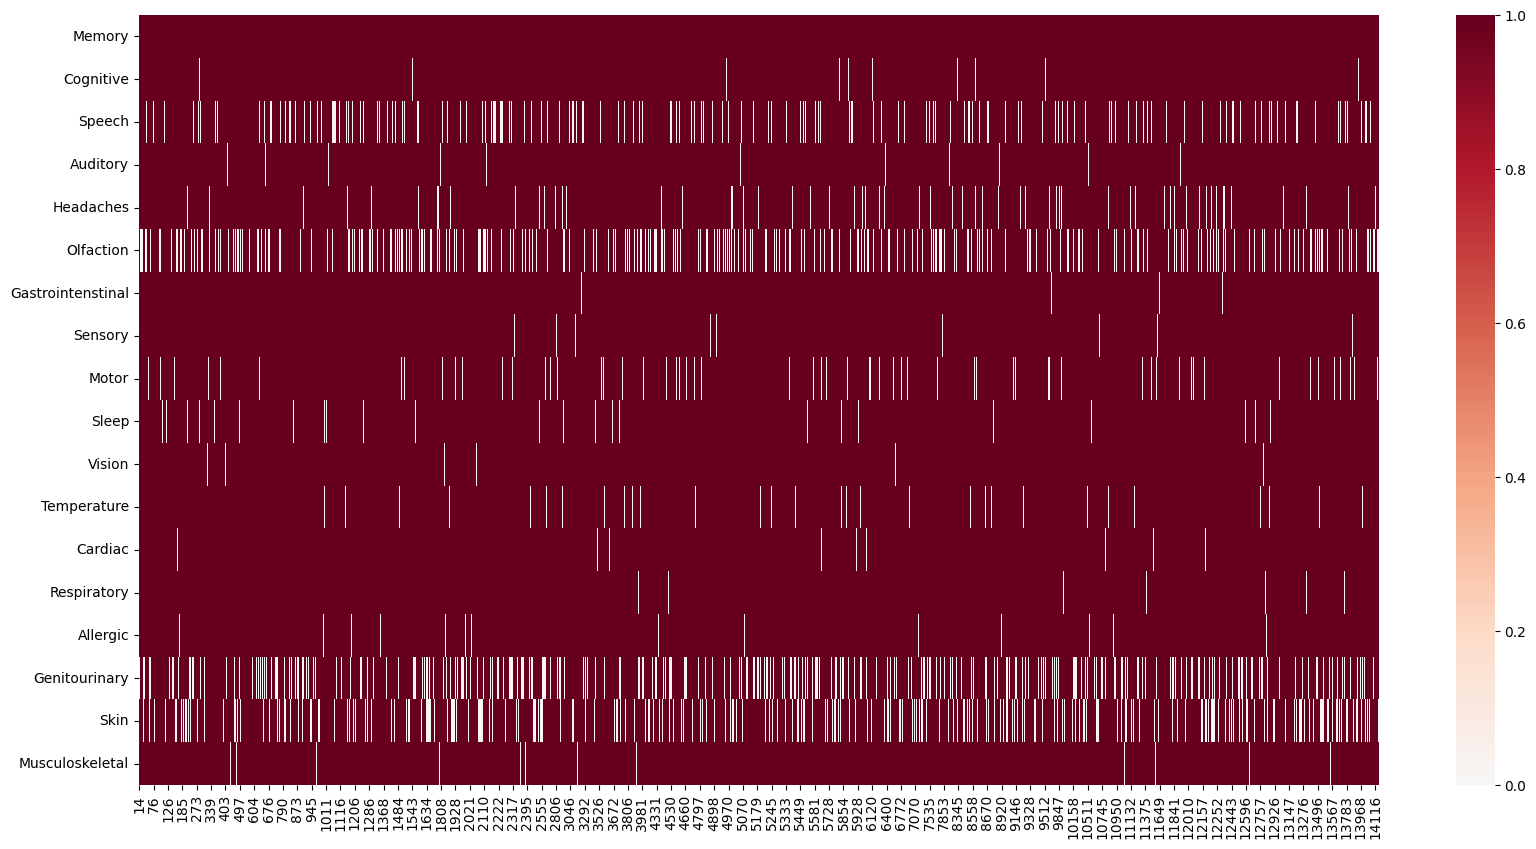

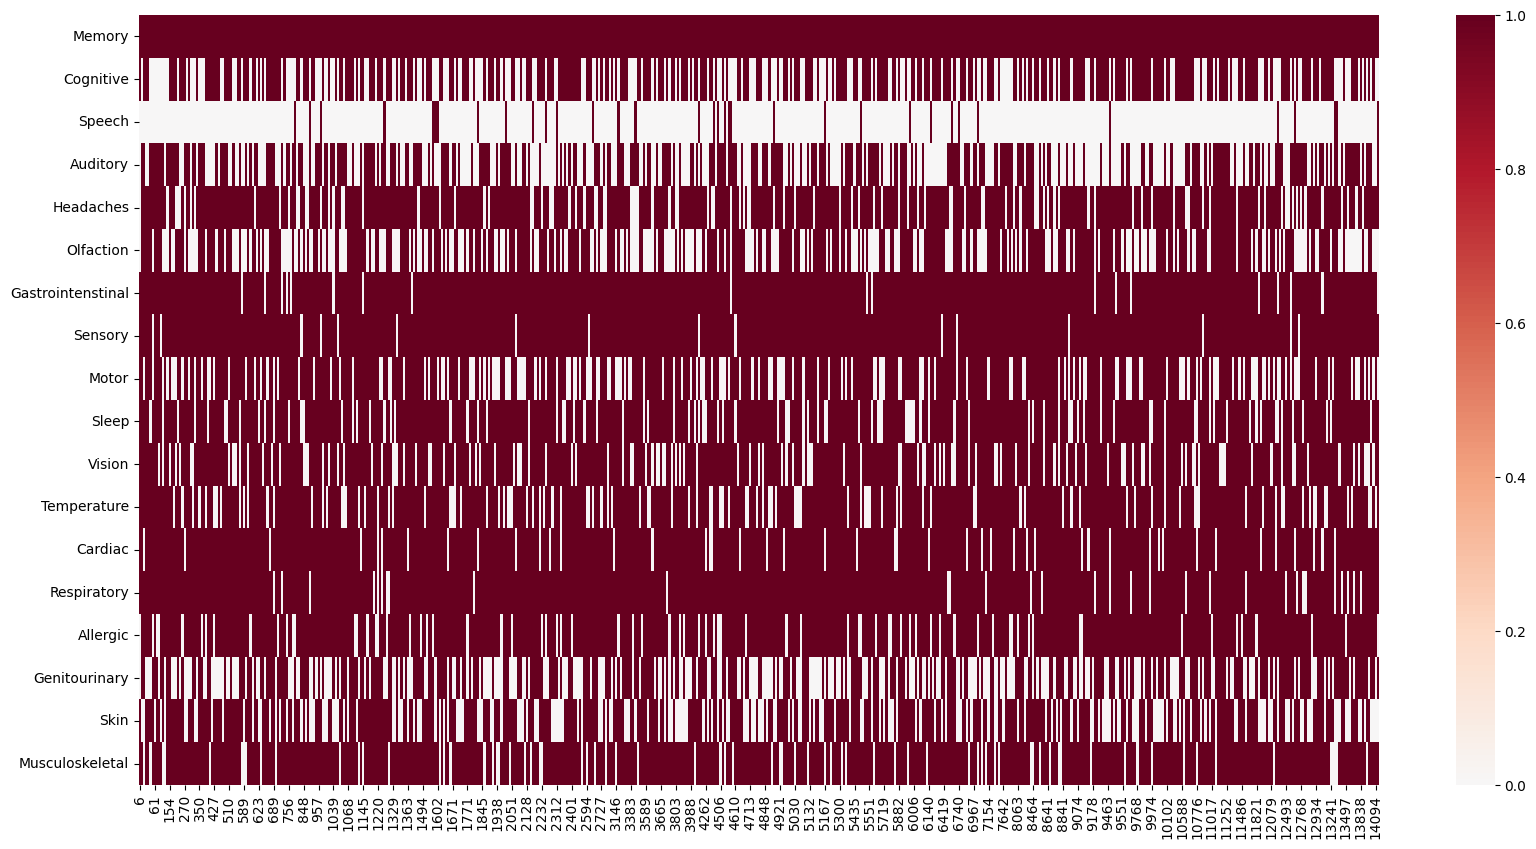

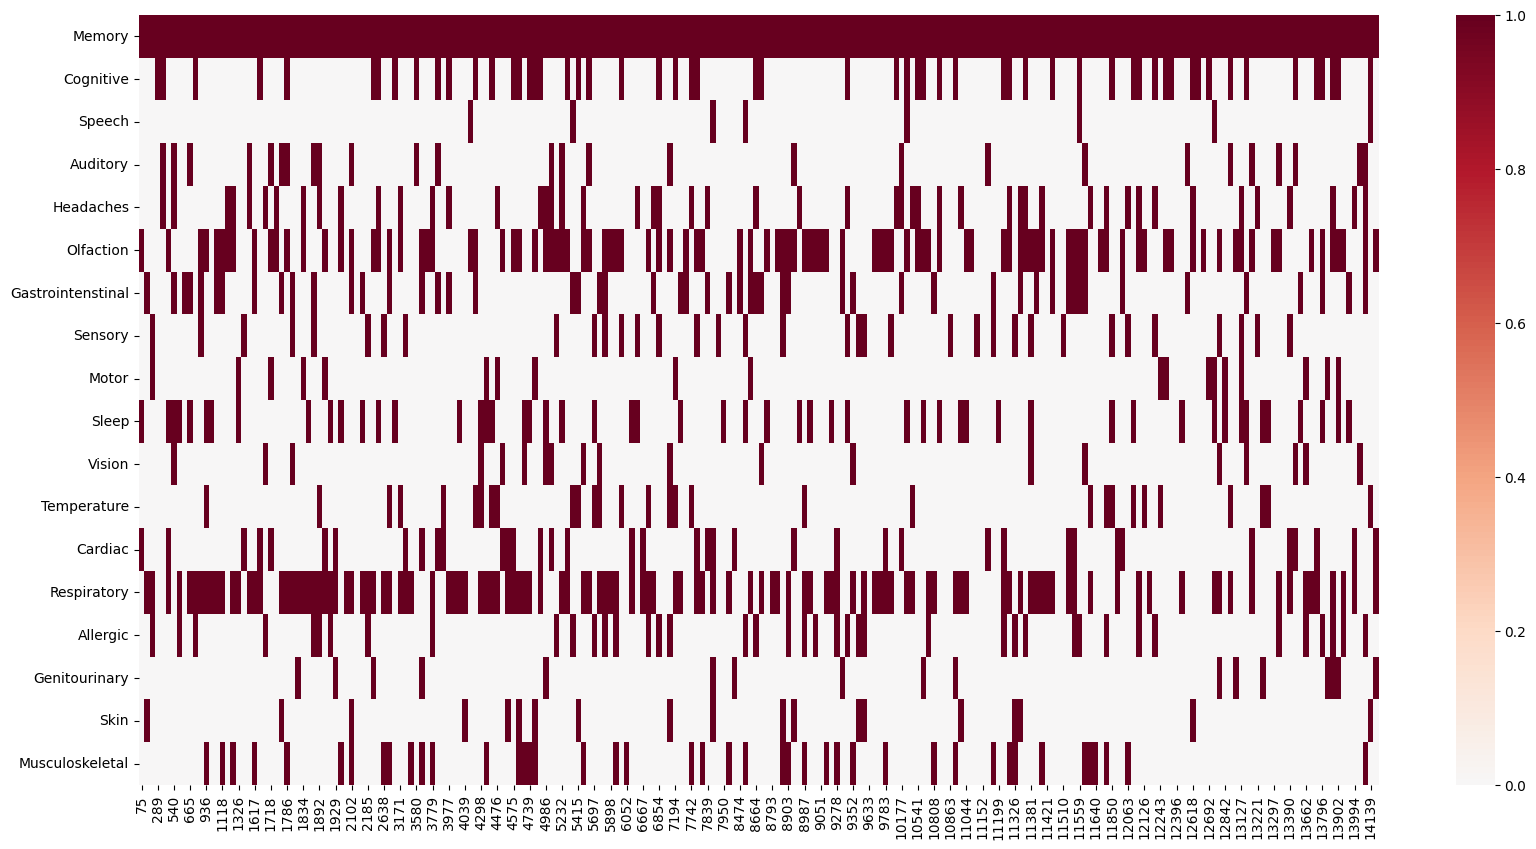

In [87]:
# plot a heatmap for each cluster
for i in range(6):
    plt.figure(figsize=(20,10))
    sns.heatmap(df.loc[df.cluster == i, df.columns != 'cluster'].transpose(), cmap='RdBu_r', center=0)
    #plt.savefig(f"output/stepmix_sympgrouping_010224_cluster{i}.png")
    #plt.close()

In [88]:
preddf = pd.DataFrame(model.predict_proba(anydf),index=sympdf.index)
#print(preddf[preddf > 0.5].notna().sum(axis=1).value_counts())
poor_fits = preddf[preddf[preddf > 0.5].notna().sum(axis=1) == 0].index.values
#res13["clusters"].loc[res13["clusters"].index.isin(poor_fits),'cluster']= np.nan


In [89]:
preddf

,0,1,2,3,4,5
3,0.946850,0.012166,0.030792,2.628476e-08,0.009354,8.377406e-04
5,0.001599,0.936329,0.015180,2.600629e-02,0.020885,1.319628e-09
6,0.218140,0.304930,0.008120,5.587275e-04,0.468250,1.547160e-06
8,0.141490,0.560896,0.048373,5.085823e-04,0.248729,2.511783e-06
9,0.010697,0.560453,0.002998,8.769016e-02,0.338161,6.939382e-09
...,...,...,...,...,...,...
14158,0.000089,0.354824,0.001357,6.103787e-01,0.033352,2.268388e-11
14161,0.040684,0.208139,0.731515,5.553284e-05,0.019584,2.174104e-05
14163,0.000073,0.360480,0.000881,6.229685e-01,0.015597,5.983862e-12
14166,0.015572,0.036996,0.941039,1.647736e-05,0.006297,7.922144e-05


In [91]:
len(poor_fits)

616

In [92]:
mm = model.get_mm_df()
mm = mm.reset_index()
mm  = mm.drop("model_name",axis=1)
mm  = mm.drop("param",axis=1)
mm.index=mm['variable']
mm = mm.drop("variable", axis=1)

mm.to_csv("output/stepmix_sympgrouping_010224_mmdf.csv")

/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:1173: FutureWarning: The provided callable <function mean at 0x104836fc0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  return pd.pivot_table(


In [93]:
preddf.to_csv("output/stepmix_sympgrouping_010224_preddf.csv")

In [111]:
clusfull = pd.read_csv("output/cluster_13_111023.csv", index_col=0)

In [112]:
clusters['full']  = clusfull['cluster']

In [113]:
# compare the membership of two clusters in clusters['cluster'] and clusters['full']

from sklearn.metrics.cluster import adjusted_rand_score


In [114]:
ari = adjusted_rand_score(clusters['full'], clusters['cluster'])


In [115]:
ari

0.1449249257440642

<Axes: xlabel='full', ylabel='cluster'>

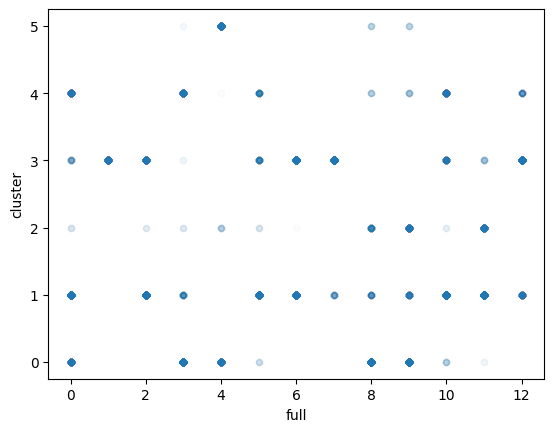

In [116]:
clusters.plot.scatter(x='full', y='cluster', alpha = 0.02)

# overlap seems to be pretty damn limited 
# grouped cluster 5 correspond to full 

In [110]:
# only really meaningful thing is that cluster 5 is almost all cluster 4 in the bigger one 
# which seems not super useful...

full
8    1012
0     808
5     765
3     722
6     711
2     651
4     504
1     483
7     375
Name: count, dtype: int64

In [117]:
weights_full = pd.read_csv("output/stepmix_13_111023_mmdf.csv", index_col=0)

In [120]:
weights_full = weights_full.T

In [121]:
weights_full

variable,Symptom_Acid_reflux,Symptom_Acute_confusion,Symptom_Altered_smell,Symptom_Altered_taste,Symptom_Awakened_cannot_breathe,Symptom_Bladder_control,Symptom_Bone_ache_burning,Symptom_Bradycardia,Symptom_Bulging_veins,Symptom_Change_sensitivity_to_meds,...,Symptom_Tachycardia,Symptom_Temp_lability,Symptom_Tightness_of_chest,Symptom_Tinnitus,Symptom_Tremors,Symptom_Vibrating_sensations,Symptom_Vivid_dreams,Symptom_Vomiting,Symptom_Waking_up_early,Symptom_Waking_up_in_night
0,0.369313,0.158894,0.234075,0.294896,0.411089,0.077947,0.191254,0.107701,0.065197,0.159283,...,0.590105,0.501290,0.766850,0.261456,0.282599,0.293808,0.413275,0.174588,2.800460e-01,6.224729e-01
1,0.778143,0.729363,0.630750,0.686550,0.814108,0.623220,0.766245,0.502651,0.638088,0.566458,...,0.929418,0.782689,0.945051,0.841599,0.955029,0.939546,0.742495,0.462721,5.740220e-01,8.395457e-01
2,0.261859,0.332791,0.239889,0.324640,0.326454,0.197429,0.338728,0.184272,0.207303,0.259973,...,0.629812,0.371060,0.615997,0.392957,0.591240,0.611811,0.480590,0.103181,2.845132e-01,5.474075e-01
3,0.311695,0.006498,0.128902,0.166464,0.226307,0.073372,0.123384,0.112754,0.099513,0.153706,...,0.536427,0.304301,0.658260,0.247812,0.323039,0.321328,0.175142,0.109709,1.616791e-01,3.403163e-01
4,0.070601,0.002650,0.186369,0.204628,0.040881,0.012969,0.044037,0.022976,0.007947,0.068979,...,0.175797,0.111023,0.341442,0.053877,0.080666,0.083817,0.023417,0.015399,1.100422e-02,1.745784e-02
5,0.378852,0.137513,0.218547,0.255830,0.167142,0.192251,0.248822,0.168842,0.230418,0.201579,...,0.655498,0.429783,0.811872,0.402797,0.350066,0.464626,0.122664,0.192695,1.000000e-15,1.000000e-15
6,0.499738,0.271905,0.291139,0.373894,0.471065,0.207922,0.307560,0.217895,0.155492,0.283753,...,0.765034,0.597906,0.878470,0.426164,0.430797,0.449366,0.433398,0.264398,3.615968e-01,6.842099e-01
7,0.607283,0.543851,0.394780,0.483498,0.626777,0.375148,0.571956,0.363933,0.426074,0.384993,...,0.878357,0.560493,0.895270,0.710420,0.745380,0.723669,0.547085,0.271906,4.000678e-01,7.092860e-01
8,0.109271,0.026073,0.159839,0.168903,0.208660,0.055067,0.070438,0.059510,0.022518,0.078113,...,0.368614,0.190914,0.431745,0.138278,0.162532,0.159089,0.268378,0.026205,3.128976e-01,6.801714e-01
9,0.146344,0.062251,0.131101,0.171925,0.068720,0.036139,0.094327,0.087034,0.044395,0.074782,...,0.379843,0.200708,0.547078,0.153206,0.179456,0.213276,0.076601,0.044461,1.000000e-15,1.000000e-15


In [147]:
bool_grouped_coefs =pd.DataFrame(index=weights_full.index, columns=groups_df.group.unique())
mean_grouped_coefs =pd.DataFrame(index=weights_full.index, columns=groups_df.group.unique())

for grouping in groups_df.group.unique():
    # calculate the average score for each symptom in the group for each cluster in 'cluster'
    keepcols = groups_df.loc[groups_df.group == grouping, 'symptom'][groups_df.loc[groups_df.group == grouping, 'symptom'].isin(weights_full.columns)].tolist()

    groupsymps = weights_full.loc[:, keepcols]
    mean_grouped_coefs[grouping] = groupsymps.mean(axis=1)
    bool_grouped_coefs[grouping] = groupsymps.round().any(axis=1).astype(int)

In [148]:
mean_grouped_coefs

,Memory,Cognitive,Speech,Auditory,Headaches,Olfaction,Gastrointenstinal,Sensory,Motor,Sleep,Vision,Temperature,Cardiac,Respiratory,Allergic,Genitourinary,Skin,Musculoskeletal,Misc
0,0.279674,0.360900,0.014002,0.134915,0.301174,0.250571,0.398310,0.168619,0.285164,0.456275,0.152512,0.412985,0.441761,0.499638,0.164682,0.100850,0.113134,0.417595,0.225638
1,0.603109,0.738517,0.656196,0.699920,0.694964,0.606898,0.789944,0.697972,0.790113,0.738549,0.713303,0.795830,0.771199,0.696888,0.576383,0.405513,0.640693,0.901820,0.618939
2,0.505050,0.617174,0.540773,0.333918,0.406198,0.262676,0.324631,0.401188,0.498214,0.437490,0.393702,0.398453,0.526288,0.414885,0.212328,0.131482,0.209974,0.582754,0.290869
3,0.202082,0.045565,0.012680,0.118345,0.146912,0.152667,0.306945,0.190414,0.234839,0.245449,0.095051,0.279367,0.359605,0.410398,0.129584,0.078891,0.113913,0.319038,0.197938
4,0.208184,0.049278,0.013487,0.029751,0.049461,0.177705,0.087547,0.054890,0.071001,0.044834,0.023732,0.087702,0.118692,0.231987,0.053593,0.026673,0.030720,0.120161,0.081804
5,0.314497,0.363927,0.202730,0.229912,0.273274,0.220226,0.414840,0.312396,0.295740,0.110102,0.286838,0.431745,0.505891,0.531855,0.244869,0.147598,0.237055,0.479671,0.308185
6,0.412847,0.554056,0.417848,0.311538,0.368165,0.313242,0.524232,0.263751,0.411181,0.519571,0.275426,0.563179,0.570288,0.600379,0.261878,0.212651,0.186203,0.533424,0.299979
7,0.479535,0.630872,0.548107,0.502883,0.516220,0.401404,0.606887,0.532735,0.653168,0.586265,0.524503,0.619126,0.668710,0.620302,0.402575,0.266935,0.362208,0.791103,0.467670
8,0.264741,0.267305,0.034783,0.067421,0.129217,0.175600,0.124559,0.100693,0.183460,0.399023,0.085392,0.159049,0.245398,0.292265,0.074951,0.044048,0.048888,0.207054,0.127831
9,0.287434,0.341378,0.086663,0.091377,0.194460,0.155304,0.161366,0.123341,0.166287,0.060857,0.084365,0.179462,0.297593,0.349122,0.090367,0.048420,0.065071,0.269911,0.144294


In [149]:
bool_grouped_coefs

,Memory,Cognitive,Speech,Auditory,Headaches,Olfaction,Gastrointenstinal,Sensory,Motor,Sleep,Vision,Temperature,Cardiac,Respiratory,Allergic,Genitourinary,Skin,Musculoskeletal,Misc
0,1,1,0,0,0,0,1,0,0,1,0,1,1,1,0,0,0,1,1
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,0,0,1,1,1,1,1,1,1,0,0,0,1,1
3,1,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,1
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,1,1,1,0,0,0,1,1,0,0,0,1,1,1,0,0,0,1,1
6,1,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,0,1,1
7,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1
8,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
9,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1
